Name - Ifeanyichukwu Sharon Dim

Course- Deep Learning Application coursework

ID NO- DIM21537678

1) PRE-PROCESSING THE DATA:

After the dataset was loaded into the notebook, the images were pre-processed and converted to a dimension of 299x299 by extracting the ROIs (regions of interest).

Each ROI was then randomly cropped three times into 598x598 images, with random flips and rotations.

The images are labelled with two labels: label normal - 0 for the negative and 1 for the positive label - full multi-class labels, 0 is negative, 1 is benign calcification, 2 is benign mass, 3 is malignant calcification, and 4 is malignant mass.

The dataset consists of. npy and .tf-records files, which were accessed using NumPy and parsed through tensor flow.

The data consists of shapes (7682, 299, 299, 1) and labels (7682,) for labels which indicates 7682 samples of images with a size of 299x299 pixels and a single channel (grayscale) along with corresponding labels, the size of the images was reshaped to a dimension of (244 x 244 pixels), giving a data shape of (7682, 244, 244, 1).

This large image dataset was split into a subset of 1000 images, which was used for this work due to limitations in compute units.

A few samples from the subset dataset were visualized to see the nature of the images and their corresponding labels. Some data distribution analyses were carried out on the dataset, and the different class distributions were checked to see if there are multiple classes, such as benign vs malignant, to ensure the dataset is balanced or if there's a class imbalance.

In [1]:
#Importing all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pandas as pd
import tensorflow as tf
from matplotlib.colors import ListedColormap
%matplotlib inline
import os
import PIL
import PIL.Image
from tensorflow_datasets.core.utils.lazy_imports_utils import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
#loading the data from it's file path on kaggle
ddsm_path = '/kaggle/input/ddsm-mammography'

In [3]:
import os

# Listing files contained in the DDSM directory
for root, dirs, files in os.walk(ddsm_path):
    for file in files:
        print(os.path.join(root, file))

/kaggle/input/ddsm-mammography/cv10_labels.npy
/kaggle/input/ddsm-mammography/test10_labels.npy
/kaggle/input/ddsm-mammography/training10_1/training10_1.tfrecords
/kaggle/input/ddsm-mammography/cv10_data/cv10_data.npy
/kaggle/input/ddsm-mammography/test10_data/test10_data.npy
/kaggle/input/ddsm-mammography/training10_3/training10_3.tfrecords
/kaggle/input/ddsm-mammography/training10_2/training10_2.tfrecords
/kaggle/input/ddsm-mammography/training10_0/training10_0.tfrecords
/kaggle/input/ddsm-mammography/training10_4/training10_4.tfrecords


In [4]:
#installing pillow,for ease of use in image-related tasks in Python
!pip install Pillow

In [5]:
# Loading numpy data
cv10_data = np.load('/kaggle/input/ddsm-mammography/cv10_data/cv10_data.npy')
cv10_labels = np.load('/kaggle/input/ddsm-mammography/cv10_labels.npy')

#Check for the data and label shape
print("Data shape:", cv10_data.shape)
print("Labels shape:", cv10_labels.shape)

Data shape: (7682, 299, 299, 1)
Labels shape: (7682,)


In [6]:
from sklearn.model_selection import train_test_split

# Define the size of the subset
subset_size = 1000

# Randomly sample a subset from the data
random_indices = np.random.choice(cv10_data.shape[0], subset_size, replace=False)

# Create the subset of data and labels
subset_data = cv10_data[random_indices]
subset_labels = cv10_labels[random_indices]

# Split the subset into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(
    subset_data, subset_labels, test_size=0.2, random_state=42
)

# Check the shapes of the subset and the splits
print("Subset Data shape:", subset_data.shape)
print("Subset Labels shape:", subset_labels.shape)
print("Train Data shape:", train_data.shape)
print("Validation Data shape:", val_data.shape)

Subset Data shape: (1000, 299, 299, 1)
Subset Labels shape: (1000,)
Train Data shape: (800, 299, 299, 1)
Validation Data shape: (200, 299, 299, 1)


In [7]:
import cv2

# Define the new shape
new_shape = (224, 224)

# Reshape the subset data
resized_subset_data = np.array([cv2.resize(img, new_shape) for img in subset_data])
resized_train_data = np.array([cv2.resize(img, new_shape) for img in train_data])
resized_val_data = np.array([cv2.resize(img, new_shape) for img in val_data])

# Check the new shapes
print("Resized Subset Data shape:", resized_subset_data.shape)
print("Resized Train Data shape:", resized_train_data.shape)
print("Resized Validation Data shape:", resized_val_data.shape)

Resized Subset Data shape: (1000, 224, 224)
Resized Train Data shape: (800, 224, 224)
Resized Validation Data shape: (200, 224, 224)


Data Distribution and image Analysis:

This is to check the distribution of different classes (if there are multiple classes, such as benign vs. malignant) to ensure the dataset is balanced or if there's a class imbalance.
The label statistics calculates statistics or summaries of labels to understand their distribution and range.
Some image analyses e.g. image size distribution and pixel intensity distribution using visuals are carried out on the data. The image size distribution was done to analyze the distribution of image sizes (height, width) in the dataset, while the pixel intensity distribution was done to explore the distribution of pixel intensities to check for anomalies or consistencies.

In [8]:
unique_values = np.unique(cv10_labels)
print(unique_values)

[0 1 2 3 4]


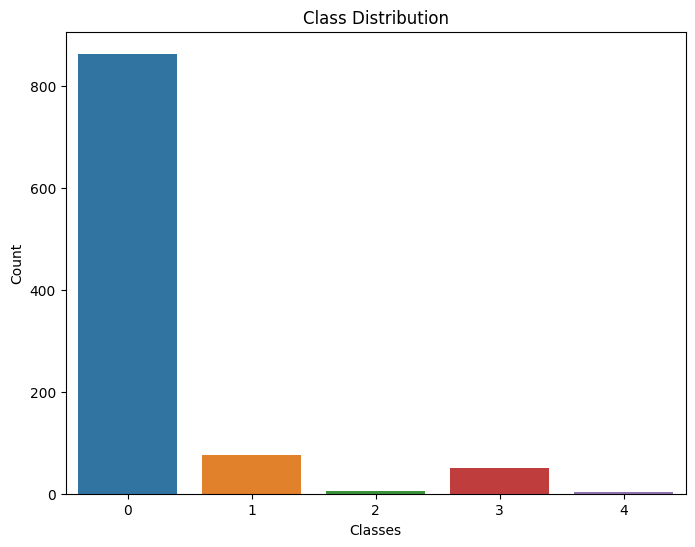

In [9]:
# Plotting class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=subset_labels)
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

In [10]:
label_stats = pd.Series(cv10_labels).describe()
print(label_stats)

count    7682.000000
mean        0.246420
std         0.737746
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
dtype: float64


In [11]:
unique_classes = np.unique(cv10_labels)
num_classes = len(unique_classes)
print(f"Number of unique classes: {num_classes}")
print(f"Unique classes: {unique_classes}")

Number of unique classes: 5
Unique classes: [0 1 2 3 4]


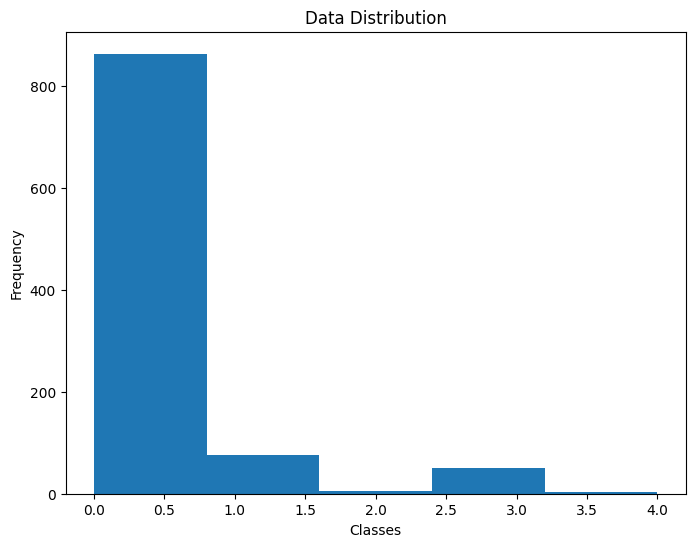

In [12]:
# Assuming 'subset_labels' contains the labels for your subset data
# Plotting data distribution
plt.figure(figsize=(8, 6))
plt.hist(subset_labels, bins=len(set(subset_labels)))  # assuming your labels are numeric
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Data Distribution')
plt.show()

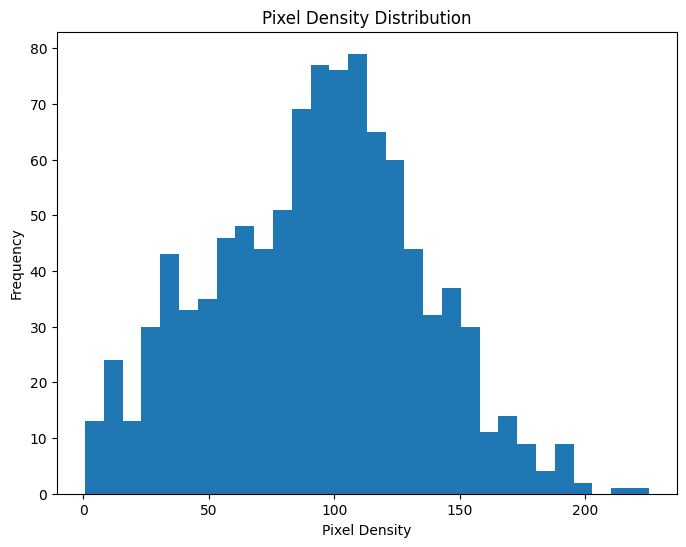

In [13]:
# Compute pixel density for each image
pixel_density = [np.sum(image) / np.prod(image.shape) for image in subset_data]

# Plotting pixel density distribution
plt.figure(figsize=(8, 6))
plt.hist(pixel_density, bins=30)
plt.title('Pixel Density Distribution')
plt.xlabel('Pixel Density')
plt.ylabel('Frequency')
plt.show()

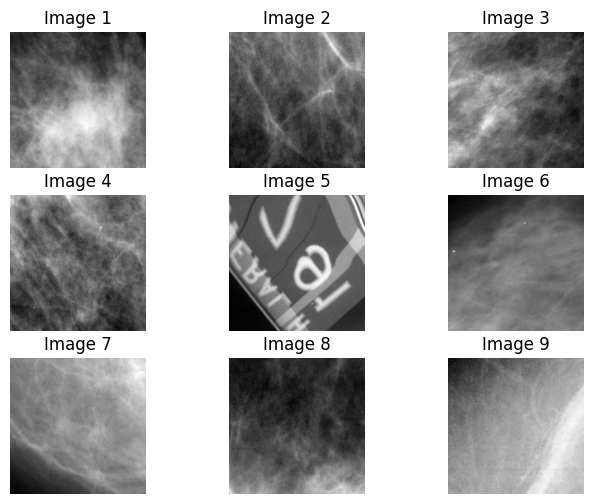

In [14]:
# Displaying sample images
plt.figure(figsize=(8, 6))
for i in range(9):  # Displaying the first 9 images as samples
    plt.subplot(3, 3, i + 1)
    plt.imshow(subset_data[i], cmap='gray')  # Displaying grayscale images
    plt.title(f"Image {i + 1}")
    plt.axis('off')
plt.show()

In [15]:
import os

# Search for a file with a specific name or format in a directory
for root, dirs, files in os.walk('/path/to/parent/directory'):
    for file in files:
        if file.endswith('.tfrecords'):  # Modify this with your file format
            print(os.path.join(root, file))

In [16]:
import tensorflow as tf

# Create a TFRecordDataset
tfrecord_file = '/kaggle/input/ddsm-mammography/training10_0/training10_0.tfrecords'
dataset = tf.data.TFRecordDataset(tfrecord_file)

# Parse the TFRecordDataset
# Defining parsing function and mapping it to the dataset
def _parse_function(example_proto):
    # Parse the input 
    feature_description = {
        'feature_name': tf.io.FixedLenFeature([], tf.float32),
    }
    parsed_example = tf.io.parse_single_example(example_proto, feature_description)
    return parsed_example

parsed_dataset = dataset.map(_parse_function)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for data augmentation
datagen_subset = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255  # Normalizing pixel values to be between 0 and 1
)

# Using the data generator to augment your subset data
augmented_subset = datagen_subset.flow(subset_data, subset_labels, batch_size=32)

2) DEFINING THE CNN ARCHITECTURE:

The data was split to train and test set, with a test size of 0.2, meaning 20% of the data was allocated for testing while 80% was allocated for training.

One-Hot Encoding (for Classification) was performed on the labels.

A Conv2D layer created a convolutional kernel that is convolved with the input layer to produce a tensor of outputs.

The 32 signifies the number of output filters in the convolution. This is to determines the depth of the output volume.

 The (3, 3) value represents the spatial size of the convolutional window.
 
The activation function: 'relu' (Rectified Linear Unit) was used to introduce non-linearity in the model.

The Conv2D layer adds another convolutional layer with 64 filters to extract more complex features from the previous layer's outputs.

BatchNormalization normalizes and scales the inputs, which aids in the stability and speed of the training process. It normalizes the activations of the previous layer at each batch.

MaxPooling2D performs max pooling operation for spatial down-sampling, reducing spatial dimensions by taking the maximum value within a 2x2 window.

In [18]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming subset_data is your subset and has a shape (1000, 299, 299, 1)
resized_subset_data = np.zeros((subset_data.shape[0], 224, 224, 1))

for i in range(subset_data.shape[0]):
    img = cv2.resize(subset_data[i], (224, 224))
    img = np.expand_dims(img, axis=-1)  # Add an extra dimension for channels
    resized_subset_data[i] = img

# Check the shapes of the resized subset data
print("Resized Subset Data shape:", resized_subset_data.shape)

# Split the resized subset into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(
    resized_subset_data, subset_labels, test_size=0.2, random_state=42
)

# Check the shapes of the training and validation sets
print("Train Data shape:", train_data.shape)
print("Validation Data shape:", val_data.shape)

Resized Subset Data shape: (1000, 224, 224, 1)
Train Data shape: (800, 224, 224, 1)
Validation Data shape: (200, 224, 224, 1)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  
])

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model on the subset data
history = model.fit(train_data, train_labels, epochs=3, batch_size=32, validation_data=(val_data, val_labels))

Epoch 1/3
25/25 [==============================] - 46s 2s/step - loss: 18.4718 - accuracy: 0.6750 - val_loss: 0.8999 - val_accuracy: 0.8400
Epoch 2/3
25/25 [==============================] - 44s 2s/step - loss: 1.4524 - accuracy: 0.8375 - val_loss: 1.4452 - val_accuracy: 0.8550
Epoch 3/3
25/25 [==============================] - 44s 2s/step - loss: 1.6310 - accuracy: 0.8612 - val_loss: 1.4899 - val_accuracy: 0.8550


In [20]:
# A summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

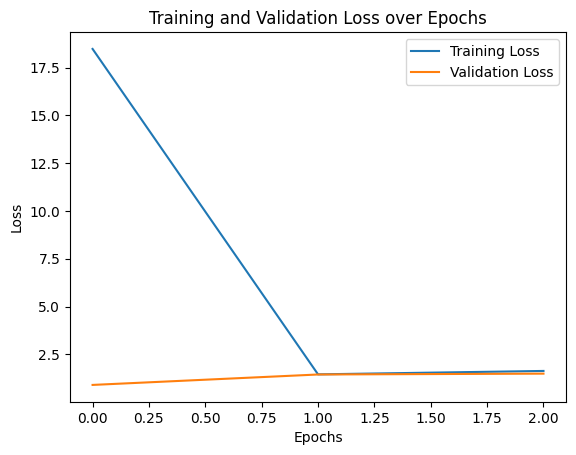

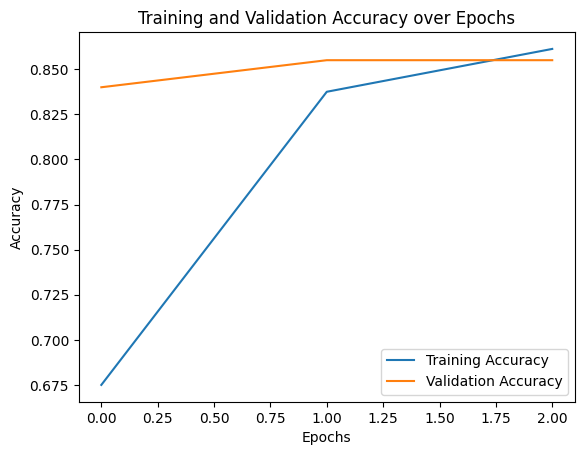

In [21]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()

In [22]:
# Accessing training accuracy and loss from history
training_accuracy = history.history['accuracy']
training_loss = history.history['loss']

# Print the final training accuracy and loss after the last epoch
final_training_accuracy = training_accuracy[-1]
final_training_loss = training_loss[-1]

print(f"Final Training Accuracy: {final_training_accuracy}")
print(f"Final Training Loss: {final_training_loss}")

Final Training Accuracy: 0.8612499833106995
Final Training Loss: 1.631045937538147


In [23]:
#FINE-TUNING THE MODEL
# Unfreeze some layers of the model
for layer in model.layers[:-5]:  # Unfreeze all layers except the last 5
    layer.trainable = True

# Recompile the model
model.compile(optimizer=Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Continue training the model (fine-tuning)
history_fine_tune = model.fit(train_data, train_labels,
                               epochs=3,  # You can change the number of epochs
                               batch_size=32,
                               validation_data=(val_data, val_labels))

Epoch 1/3
25/25 [==============================] - 45s 2s/step - loss: 4.3442 - accuracy: 0.8238 - val_loss: 0.9118 - val_accuracy: 0.8500
Epoch 2/3
25/25 [==============================] - 44s 2s/step - loss: 1.1595 - accuracy: 0.8612 - val_loss: 3.3608 - val_accuracy: 0.8600
Epoch 3/3
25/25 [==============================] - 44s 2s/step - loss: 1.3689 - accuracy: 0.8763 - val_loss: 1.3115 - val_accuracy: 0.8550


In [25]:
# After fine-tuning, saving the trained model
model.save('/path/to/save/fine_tuned_model')

In [27]:
# Evaluate the fine-tuned model on the validation set
val_loss, val_accuracy = model.evaluate(val_data, val_labels)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

7/7 [==============================] - 3s 415ms/step - loss: 1.3115 - accuracy: 0.8550
Validation Loss: 1.3114640712738037, Validation Accuracy: 0.8550000190734863


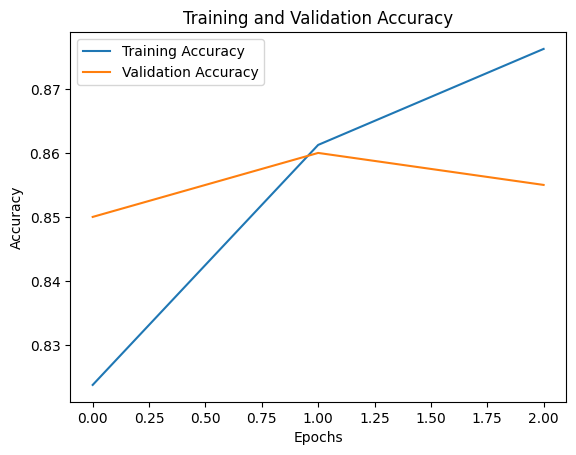

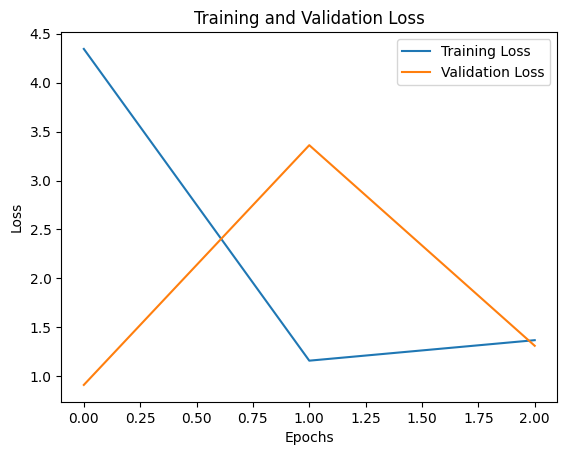

In [28]:
# Plotting training and validation accuracy
plt.plot(history_fine_tune.history['accuracy'], label='Training Accuracy')
plt.plot(history_fine_tune.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting training and validation loss
plt.plot(history_fine_tune.history['loss'], label='Training Loss')
plt.plot(history_fine_tune.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Model Evaluation: 

Evaluating the model's performance on unseen data (test set) to get a final assessment of its generalization ability. This is done to obtain the test loss and accuracy.

In [29]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (80% train, 20% test)
train_data, test_data, train_labels, test_labels = train_test_split(
    resized_subset_data, subset_labels, test_size=0.2, random_state=42
)

# Further split the train set into train and validation sets (80% train, 20% validation)
train_data, val_data, train_labels, val_labels = train_test_split(
    train_data, train_labels, test_size=0.2, random_state=42
)

# Check the shapes of your data subsets
print("Train Data shape:", train_data.shape)
print("Validation Data shape:", val_data.shape)
print("Test Data shape:", test_data.shape)

Train Data shape: (640, 224, 224, 1)
Validation Data shape: (160, 224, 224, 1)
Test Data shape: (200, 224, 224, 1)


In [30]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have predictions (predicted labels) from your model
predictions = model.predict(test_data)

# Convert probabilities to class labels (assuming binary classification)
predicted_labels = np.argmax(predictions, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(test_labels, predicted_labels))

# Confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

7/7 [==============================] - 3s 399ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       173
           1       0.20      0.07      0.10        15
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00        11

    accuracy                           0.85       200
   macro avg       0.27      0.26      0.26       200
weighted avg       0.77      0.85      0.81       200

Confusion Matrix:
[[170   3   0   0]
 [ 14   1   0   0]
 [  1   0   0   0]
 [ 10   1   0   0]]


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
model.evaluate(test_data, test_labels)

7/7 [==============================] - 3s 413ms/step - loss: 1.3115 - accuracy: 0.8550


[1.3114640712738037, 0.8550000190734863]

TESTING MY TRAINED MODEL ON A NEW SIMILAR DATASET 

The dataset used here is the iciar2018_70x30_with_DA mammogram image dataset

In [40]:
import os

# Define the path to the dataset directory
iciar_path = '/kaggle/input/iciar2018-70x30-with-da'  # Update to match the directory name

# Check the contents of the specified directory
contents = os.listdir(iciar_path)
print(contents)

['iciar2018_70x30_with_DA']


In [43]:
import os

# Check the contents of the '/kaggle/input' directory
input_path = '/kaggle/input'

# Check if the '/kaggle/input' directory exists and list its contents
if os.path.exists(input_path):
    contents = os.listdir(input_path)
    print(contents)
else:
    print(f"Directory '{input_path}' does not exist.")

['ddsm-mammography', 'iciar2018-70x30-with-da']


In [45]:
import os

# Define the path to the dataset directory
dataset_path = '/kaggle/input/iciar2018-70x30-with-da'

# Check the contents of the specified dataset directory
contents = os.listdir(dataset_path)
print(contents)

['iciar2018_70x30_with_DA']


In [46]:
import os

# Define the path to the dataset folder within 'iciar2018-70x30-with-da'
dataset_folder_path = '/kaggle/input/iciar2018-70x30-with-da/iciar2018_70x30_with_DA'

# Check the contents of the specified dataset folder
contents = os.listdir(dataset_folder_path)
print(contents)

['test', 'train']


In [47]:
import os

# Define the paths to the 'train' and 'test' directories within the dataset folder
train_path = '/kaggle/input/iciar2018-70x30-with-da/iciar2018_70x30_with_DA/train'
test_path = '/kaggle/input/iciar2018-70x30-with-da/iciar2018_70x30_with_DA/test'

# Check the contents of the 'train' directory
train_contents = os.listdir(train_path)
print("Train Set Contents:")
print(train_contents)

# Check the contents of the 'test' directory
test_contents = os.listdir(test_path)
print("\nTest Set Contents:")
print(test_contents)

Train Set Contents:
['InSitu', 'Benign', 'Normal', 'Invasive']

Test Set Contents:
['InSitu', 'Benign', 'Normal', 'Invasive']


In [50]:
# Function to preprocess images with a target size of 224x224 and convert to grayscale
def preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path)
    img = img.convert('L')  # Convert to grayscale
    img = img.resize(target_size)  # Resize images to 224x224
    img = np.array(img) / 255.0   # Normalize pixel values
    # Expand dimensions to match expected input shape for the model (add channel dimension)
    img = np.expand_dims(img, axis=-1)
    return img

In [51]:
from tensorflow.keras.models import load_model

# Replace 'model_path' with the path to your pre-trained model
model_path = '/path/to/save/fine_tuned_model'
pretrained_model = load_model(model_path)

In [52]:
# Iterate through test data and make predictions using the loaded model
test_predictions = []
test_labels = []

# Iterate through each class in the test set
for class_name in os.listdir(test_path):
    class_dir = os.path.join(test_path, class_name)
    if os.path.isdir(class_dir):
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check if it's an image file
                preprocessed_img = preprocess_image(img_path)
                prediction = pretrained_model.predict(np.expand_dims(preprocessed_img, axis=0))
                test_predictions.append(prediction)
                test_labels.append(class_name)  # Assuming directory names are class labels

test_predictions = np.vstack(test_predictions)  # Stack predictions vertically

1/1 [==============================] - 0s 40ms/step


In [53]:
from sklearn.metrics import accuracy_score

# Convert predicted probabilities to class labels (argmax for class prediction)
predicted_classes = np.argmax(test_predictions, axis=1)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predicted_classes)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

Accuracy on the test set: 0.00%


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:227: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


In [55]:
print("Predicted Classes:", predicted_classes[:10])  # Print first 10 predicted classes
print("True Labels:", test_labels[:10])  # Print first 10 true labels

Predicted Classes: [0 0 0 0 0 0 0 0 0 0]
True Labels: ['InSitu', 'InSitu', 'InSitu', 'InSitu', 'InSitu', 'InSitu', 'InSitu', 'InSitu', 'InSitu', 'InSitu']


In [56]:
# Assuming 'preprocessed_img' is the preprocessed image for a single test image
single_prediction = pretrained_model.predict(np.expand_dims(preprocessed_img, axis=0))
print("Single Prediction:", single_prediction)

1/1 [==============================] - 0s 46ms/step
Single Prediction: [[0.32734576 0.19512825 0.15469548 0.18412918 0.13870136]]


In [58]:
predicted_class_index = np.argmax(single_prediction)

In [59]:
# List of class labels corresponding to the model's output
class_labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']

# Map the predicted index to the class label
predicted_class_label = class_labels[predicted_class_index]

print("Predicted Class Label:", predicted_class_label)

Predicted Class Label: Class 1


In [60]:
# Iterate through multiple test images
test_predictions = []  # Store all predictions
test_true_labels = []  # Store true labels

for class_name in os.listdir(test_path):
    class_dir = os.path.join(test_path, class_name)
    if os.path.isdir(class_dir):
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                preprocessed_img = preprocess_image(img_path)
                single_prediction = pretrained_model.predict(np.expand_dims(preprocessed_img, axis=0))
                
                # Obtain predicted class index
                predicted_class_index = np.argmax(single_prediction)
                
                # Assuming you have a list of class labels
                class_labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']
                predicted_class_label = class_labels[predicted_class_index]
                
                # Store predictions and true labels
                test_predictions.append(predicted_class_label)
                test_true_labels.append(class_name)  # Assuming directory names are class labels

1/1 [==============================] - 0s 40ms/step


In [63]:
single_prediction = pretrained_model.predict(np.expand_dims(preprocessed_img, axis=0))
print("Single Prediction:", single_prediction)

1/1 [==============================] - 0s 40ms/step
Single Prediction: [[0.32734576 0.19512825 0.15469548 0.18412918 0.13870136]]


In [65]:
# Assuming test_true_labels and test_predictions are available

# Print out multiple individual predictions and their corresponding true labels
for i in range(len(test_true_labels)):
    print(f"Image {i+1}: Predicted - {test_predictions[i]}, True - {test_true_labels[i]}")

Image 1: Predicted - Class 1, True - InSitu
Image 2: Predicted - Class 1, True - InSitu
Image 3: Predicted - Class 1, True - InSitu
Image 4: Predicted - Class 1, True - InSitu
Image 5: Predicted - Class 1, True - InSitu
Image 6: Predicted - Class 1, True - InSitu
Image 7: Predicted - Class 1, True - InSitu
Image 8: Predicted - Class 1, True - InSitu
Image 9: Predicted - Class 1, True - InSitu
Image 10: Predicted - Class 1, True - InSitu
Image 11: Predicted - Class 1, True - InSitu
Image 12: Predicted - Class 1, True - InSitu
Image 13: Predicted - Class 1, True - InSitu
Image 14: Predicted - Class 1, True - InSitu
Image 15: Predicted - Class 1, True - InSitu
Image 16: Predicted - Class 1, True - InSitu
Image 17: Predicted - Class 1, True - InSitu
Image 18: Predicted - Class 1, True - InSitu
Image 19: Predicted - Class 1, True - InSitu
Image 20: Predicted - Class 1, True - InSitu
Image 21: Predicted - Class 1, True - InSitu
Image 22: Predicted - Class 1, True - InSitu
Image 23: Predicted

EVALUATING THE RESULTS, BY APPLYING VARIOUS EVALUATION METRICS

In [79]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(test_labels)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_labels = onehot_encoder.fit_transform(integer_encoded)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [82]:
print(onehot_labels.shape)

(6111, 4)


In [83]:
test_predictions = np.array(test_predictions)
print(test_predictions.shape)

(6111,)


In [87]:
import numpy as np

# Assuming test_predictions is the 1D array with shape (6111,)
test_predictions = np.array(test_predictions)  # Convert to NumPy array if it's a list

# Reshape the array to have a single column
reshaped_predictions = test_predictions.reshape(-1, 1)

# Now, you can perform argmax along axis 1
categorical_predictions = np.argmax(reshaped_predictions, axis=1)

In [90]:
# Convert test_labels to numerical labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
numerical_labels = label_encoder.fit_transform(test_labels)

# Now, you can compute metrics using numerical_labels and categorical_predictions

In [92]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(test_labels)  # Fit the encoder with test_labels

predicted_labels = label_encoder.inverse_transform(categorical_predictions)
# Now, you can compute metrics using test_labels and predicted_labels

In [94]:
from sklearn.preprocessing import LabelEncoder

# Assuming test_labels are strings and categorical_predictions are numerical values
# Convert categorical_predictions to strings using LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(test_labels)
categorical_predictions_str = label_encoder.inverse_transform(categorical_predictions)

# Now compute precision, recall, etc.
precision = precision_score(test_labels, categorical_predictions_str, average='weighted')
print("Precision:", precision)

Precision: 0.06235689758557934


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
precision = precision_score(test_labels, categorical_predictions_str, average='weighted', zero_division=1)
print("Precision:", precision)

Precision: 0.8126432664286493


In [97]:
from sklearn.preprocessing import LabelEncoder

# Convert labels to the same type
label_encoder = LabelEncoder()
test_labels_encoded = label_encoder.fit_transform(test_labels)

In [99]:
from sklearn.metrics import recall_score

# Calculate recall
recall = recall_score(test_labels_encoded, categorical_predictions, average='weighted')
print("Recall:", recall)

Recall: 0.24971363115693013


In [103]:
from sklearn.preprocessing import LabelEncoder

# Assuming test_labels are strings and categorical_predictions are numerical
label_encoder = LabelEncoder()
encoded_test_labels = label_encoder.fit_transform(test_labels)

# Now, calculate F1 score using the encoded labels
f1 = f1_score(encoded_test_labels, categorical_predictions, average='weighted')
print("F1 Score:", f1)

F1 Score: 0.09979389842751744
